# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | port moresby
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | urucara
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | coihaique
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | arenys de mar
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | jinchengjiang
City not found. Skipping...
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | kavaratti
Processing Recor

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,288.96,44,40,4.63,AR,1680554532
1,port moresby,-9.4431,147.1797,296.83,100,40,3.09,PG,1680554603
2,butaritari,3.0707,172.7902,301.01,80,97,8.63,KI,1680554603
3,new norfolk,-42.7826,147.0587,284.10,79,100,1.22,AU,1680554603
4,rikitea,-23.1203,-134.9692,299.68,81,90,6.33,PF,1680554454


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,288.96,44,40,4.63,AR,1680554532
1,port moresby,-9.4431,147.1797,296.83,100,40,3.09,PG,1680554603
2,butaritari,3.0707,172.7902,301.01,80,97,8.63,KI,1680554603
3,new norfolk,-42.7826,147.0587,284.10,79,100,1.22,AU,1680554603
4,rikitea,-23.1203,-134.9692,299.68,81,90,6.33,PF,1680554454


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

C:\Users\Anthony\AppData\Local\Temp\ipykernel_13888\3320702570.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title(f'City Latitude vs. Max Temp ({pd.datetime.now().date()})')


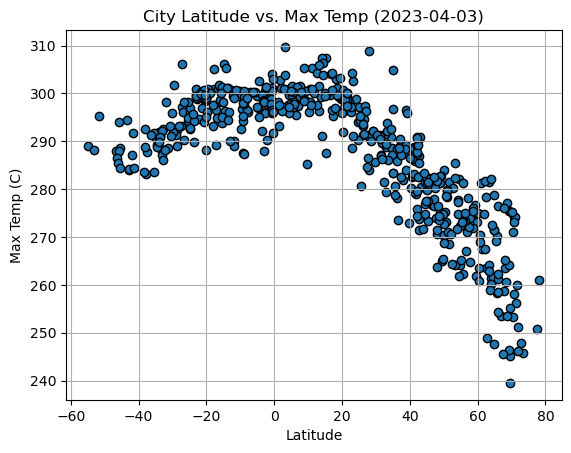

In [43]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temp ({pd.datetime.now().date()})')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

C:\Users\Anthony\AppData\Local\Temp\ipykernel_13888\2570768481.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title(f'City Latitude vs. Humidity ({pd.datetime.now().date()})')


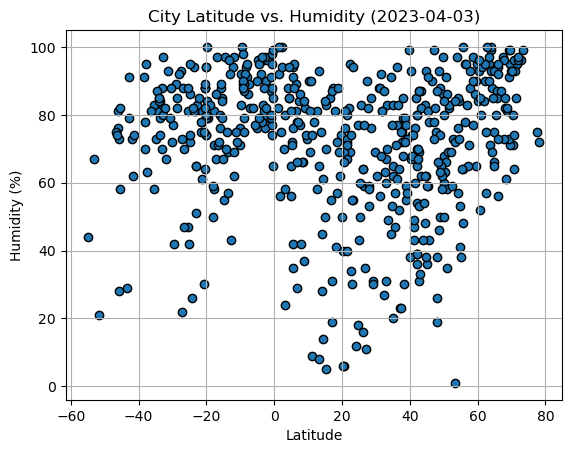

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({pd.datetime.now().date()})')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

C:\Users\Anthony\AppData\Local\Temp\ipykernel_13888\1790348189.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title(f'City Latitude vs. Cloudiness ({pd.datetime.now().date()})')


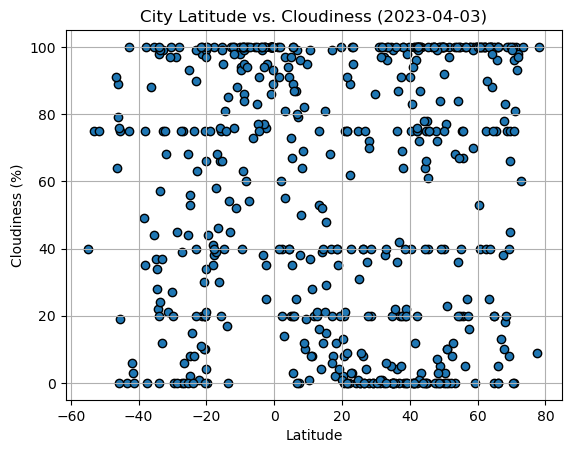

In [46]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({pd.datetime.now().date()})')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

C:\Users\Anthony\AppData\Local\Temp\ipykernel_13888\214479886.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title(f'City Latitude vs. Wind Speed ({pd.datetime.now().date()})')


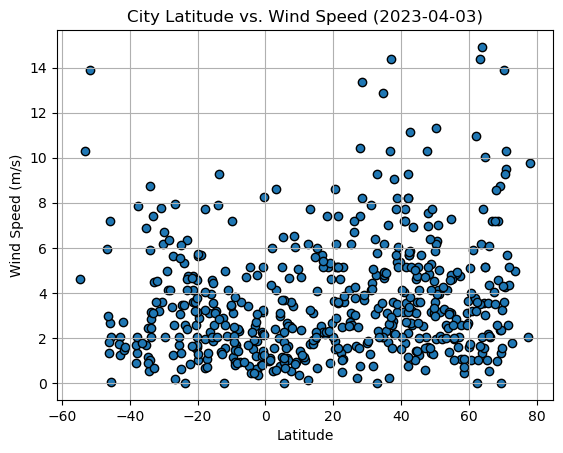

In [47]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({pd.datetime.now().date()})')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, x_equation, y_equation):

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_equation, y_equation),fontsize=15,color="red")

    # Label plot
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')

    # Print r square value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,butaritari,3.0707,172.7902,301.01,80,97,8.63,KI,1680554603
7,pevek,69.7008,170.3133,245.09,95,45,3.24,RU,1680554604
8,kodiak,57.7900,-152.4072,273.88,93,100,2.57,US,1680554604
9,provideniya,64.3833,-173.3000,260.78,88,88,3.54,RU,1680554604
12,torbay,47.6666,-52.7314,273.92,75,75,10.29,CA,1680554605


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,288.96,44,40,4.63,AR,1680554532
1,port moresby,-9.4431,147.1797,296.83,100,40,3.09,PG,1680554603
3,new norfolk,-42.7826,147.0587,284.10,79,100,1.22,AU,1680554603
4,rikitea,-23.1203,-134.9692,299.68,81,90,6.33,PF,1680554454
5,vaini,-21.2000,-175.2000,300.24,78,20,4.12,TO,1680554603


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.784282102457515


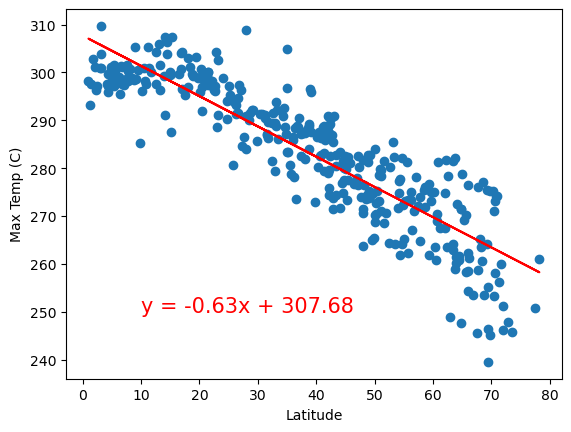

In [79]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp (C)', 10, 250)

The r-value is: 0.36170187783603247


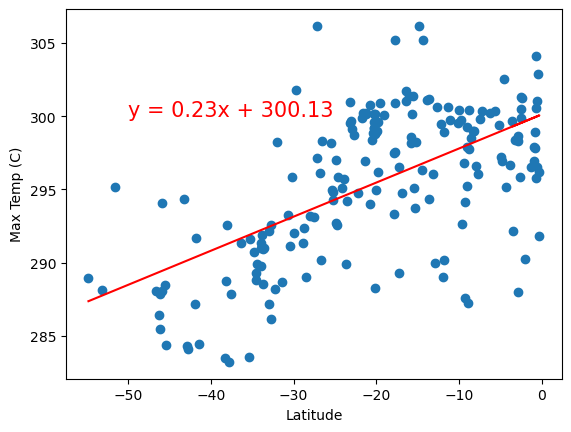

In [80]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp (C)', -50, 300)

**Discussion about the linear relationship:** Max Temperature increases as latitude approaches 0 (the equator).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.060097401663283756


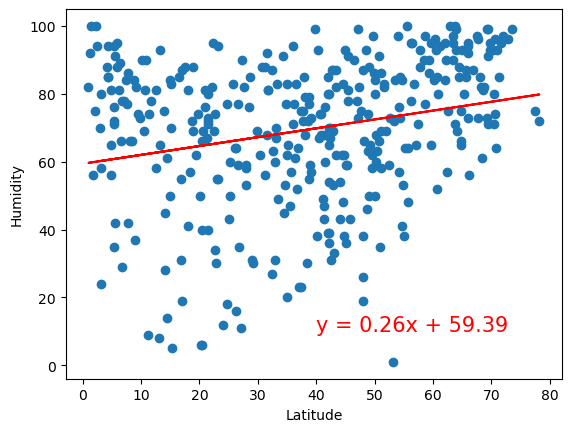

In [86]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 40, 10)

The r-value is: 0.12253522531469954


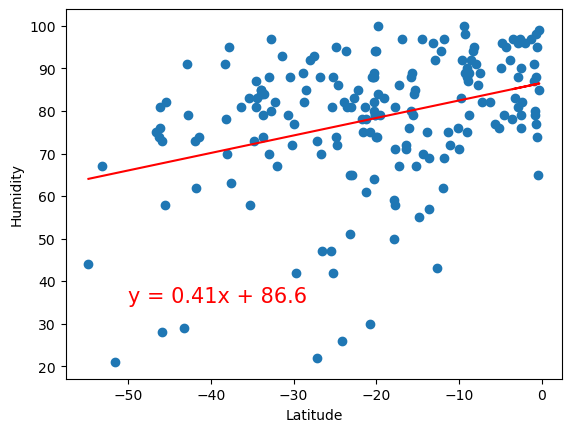

In [89]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', -50, 35)

**Discussion about the linear relationship:** Humidity increases in the southern hemisphere as latitude decreases, whereas humidity decreases as latitude decreases in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03942859512889893


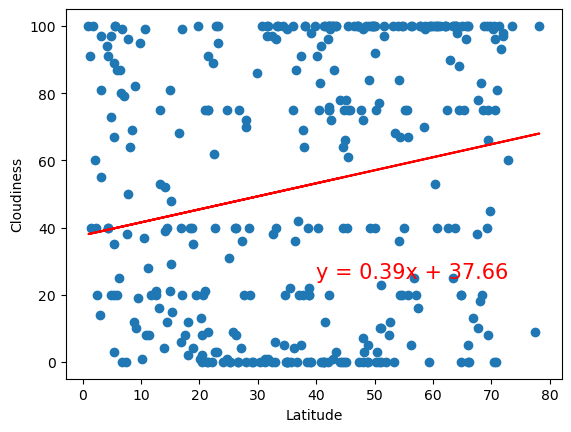

In [91]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 40, 25)

The r-value is: 0.14197558743038882


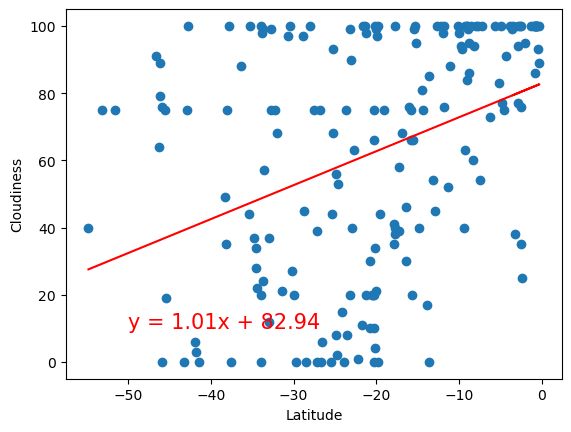

In [93]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', -50, 10)

**Discussion about the linear relationship:** Cloudiness increases in the southern hemisphere as latitude decreases, whereas Cloudiness decreases as latitude decreases in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03282896184910571


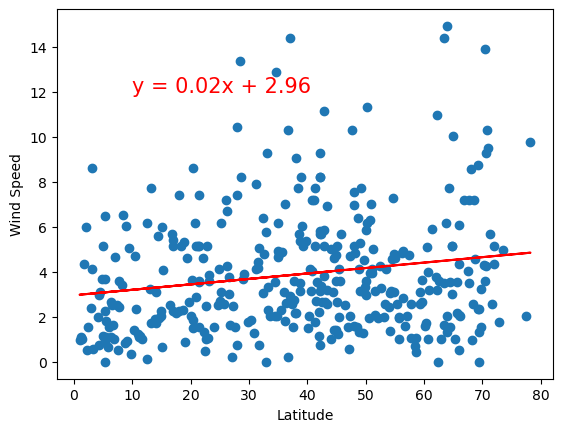

In [97]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 10, 12)

The r-value is: 0.05925778120274601


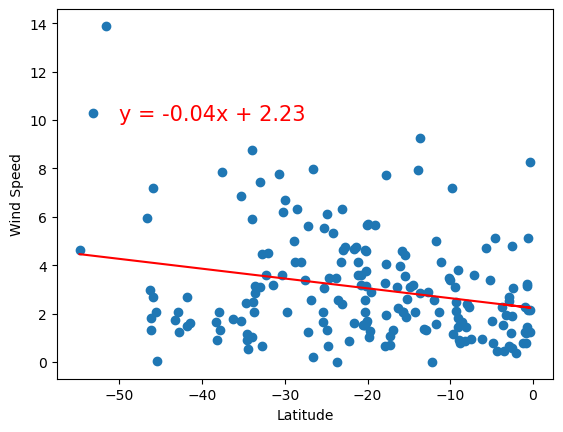

In [95]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', -50, 10)

**Discussion about the linear relationship:** Wind Speed decreases as latitude approaches 0 (the equator).